<img src="stockImage.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

## Load and Explore Data
#### Import dependancies
#### Import yahoo finance dataset
#### define columns and prediction classes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [4]:
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [5]:
len(df)

3724

## Train the data from 2004 up untilthe second to lat month
## We will predict our model on the last month 


In [6]:
training_set = df.iloc[:3690,:]
training_set = training_set.iloc[:, 1:2].values

testing_set = df.iloc[3690:,:]
testing_set = testing_set.iloc[:, 1:2].values

len(testing_set)

34

## Scale the data and select the class and feature variables

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [8]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape


(3630, 60)

In [9]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3630, 60, 1)

## Building the RNN
## We will use LTSM to learn cautiously from the data



In [10]:
# Initialising the RNN
regressor = Sequential()


In [11]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [13]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [14]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [15]:
# Adding the output layer
regressor.add(Dense(units = 1))


In [16]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [17]:
X_train.shape

(3630, 60, 1)

## Fitting the model takes time since we run many epochs 

In [18]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3630/3630 [==============================] - 20s 5ms/step - loss: 0.0117
Epoch 2/100
3630/3630 [==============================] - 14s 4ms/step - loss: 0.0020
Epoch 3/100
3630/3630 [==============================] - 13s 4ms/step - loss: 0.0019
Epoch 4/100
3630/3630 [==============================] - 13s 4ms/step - loss: 0.0018
Epoch 5/100
3630/3630 [==============================] - 14s 4ms/step - loss: 0.0017
Epoch 6/100
3630/3630 [==============================] - 15s 4ms/step - loss: 0.0018
Epoch 7/100
3630/3630 [==============================] - 13s 4ms/step - loss: 0.0015
Epoch 8/100
3630/3630 [==============================] - 14s 4ms/step - loss: 0.0014
Epoch 9/100
3630/3630 [==============================] - 14s 4ms/step - loss: 0.0015
Epoch 10/100
3630/3630 [==============================] - 14s 4ms/step - loss: 0.0015
Epoch 11/100
3630/3630 [==============================] - 14s 4ms/step - loss: 0.0013
Epoch 12/100
36

## Predictions and visualizations
#### We will use our testing set to predict the stock prices in may using our newly fit RNN
#### We will use matplotlib to plot our predicted and real stock prices

In [19]:

dataset_test =pd.DataFrame(testing_set)
real_stock_price = dataset_test.iloc[:20, 1:2].values


In [20]:
df.loc[:3690,'Open'].head()

0    49.676899
1    50.178635
2    55.017166
3    55.260582
4    52.140873
Name: Open, dtype: float64

In [21]:

dataset_total = pd.concat((df.loc[:3690,'Open'], dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [22]:
X_test = []
for i in range(60, 94):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price


array([[1210.134 ],
       [1214.2927],
       [1217.7241],
       [1220.053 ],
       [1222.5172],
       [1226.7185],
       [1231.1998],
       [1234.9601],
       [1238.3331],
       [1233.582 ],
       [1219.2012],
       [1204.8553],
       [1192.6688],
       [1184.666 ],
       [1182.2208],
       [1182.3368],
       [1180.8743],
       [1178.9547],
       [1173.8995],
       [1166.6763],
       [1157.0322],
       [1155.5991],
       [1160.416 ],
       [1162.4897],
       [1162.549 ],
       [1161.4702],
       [1158.78  ],
       [1156.9142],
       [1153.9591],
       [1149.7484],
       [1144.004 ],
       [1136.2906],
       [1123.025 ],
       [1105.5844]], dtype=float32)

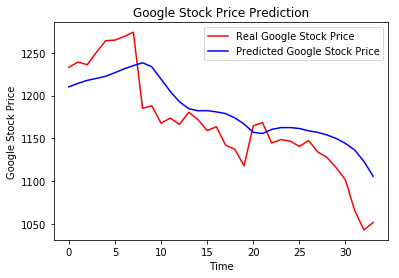

In [23]:
# Visualising the results
plt.plot(testing_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()